In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
Dataset=load_iris()

In [4]:
df = pd.DataFrame(data=Dataset.data, columns=Dataset.feature_names)
df['target'] = Dataset.target

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df['target']

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
x=df.iloc[:, : -1]
y=df['target']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [10]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [11]:
y_train.shape, y_test.shape

((120,), (30,))

In [12]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 

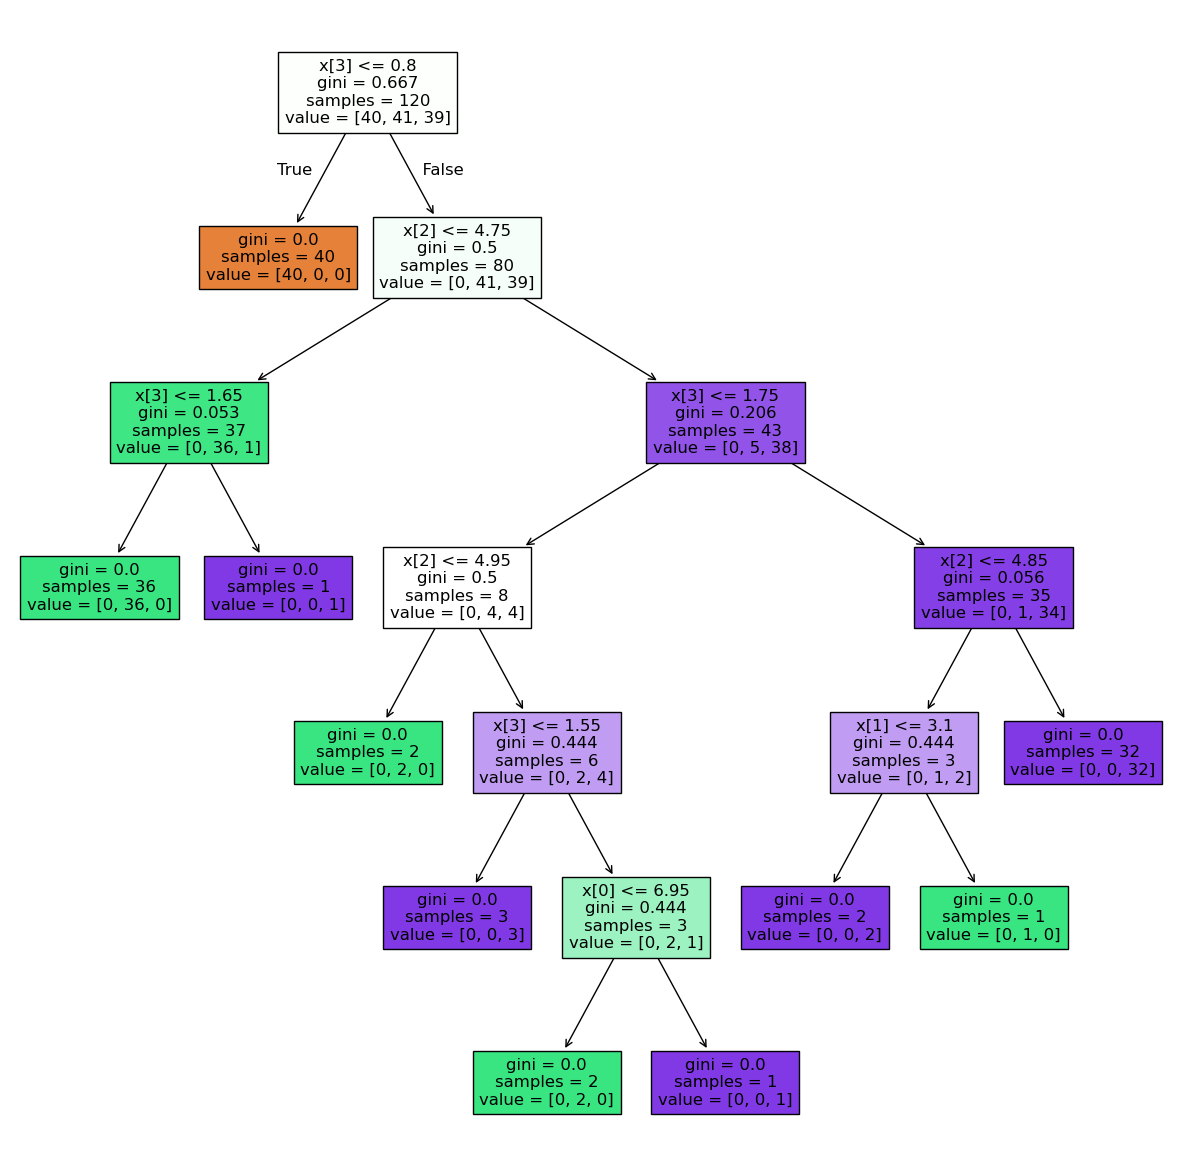

In [13]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model, filled=True)

In [15]:
from sklearn.model_selection import GridSearchCV
Parameter={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2']
}

In [22]:
clf=GridSearchCV(estimator=model, param_grid=Parameter, cv=5, scoring='accuracy')

In [23]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [24]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [28]:
model1=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt', splitter='best')

In [29]:
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt')

[Text(0.375, 0.9, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2916666666666667, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.33333333333333337, 0.8, 'True  '),
 Text(0.4583333333333333, 0.7, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.41666666666666663, 0.8, '  False'),
 Text(0.25, 0.5, 'x[0] <= 4.95\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.16666666666666666, 0.3, 'x[2] <= 3.9\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.5, 0.3, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.4166666666666667, 0.1, 'entropy = 0.0\nsample

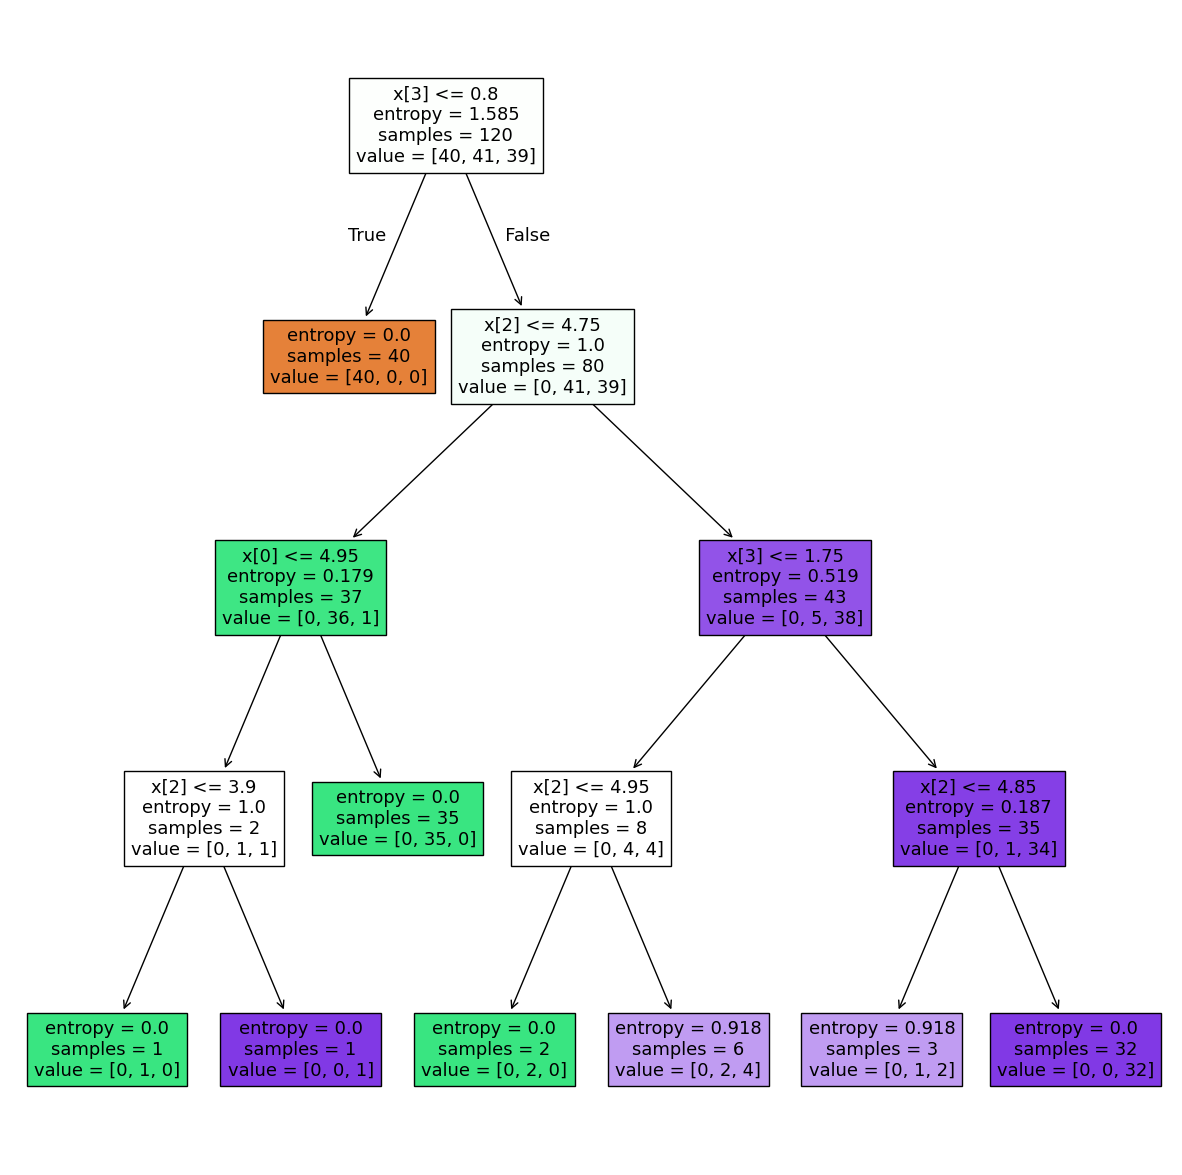

In [30]:
plt.figure(figsize=(15,15))
tree.plot_tree(model1, filled=True)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
y_pred=model1.predict(x_test)

In [34]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

